# Lab 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

The basic equations:  
$-u''=f, a<x<b$  
$u(a) = u(b) = 0$

In [2]:
# Variables
a = 0
b = 1

In [3]:
def analytical(x):
    y = x*(1-x)
    return y


def stiffness_matrix_assembler(x):
    ''' Returns the assembled stiness matrix A.
        Input is a vector x of node coordinates.'''
    N = len(x) - 1             # number of elements
    A = np.zeros((N+1, N+1))   # initialize stiffness matrix to zero
    for i in range(N):
        h = x[i+1] - x[i]      # loop over elements
        n = np.array([i, i+1]) # nodes
        A[np.ix_(n, n)] = A[np.ix_(n, n)] + np.array([[1, -1], [-1, 1]])/h  # assemble element stiffness
    A[0, 0] = 1e6              # Adjusted for BC
    A[N, N] = 1e6
    
    return A


def load_vector_assembler(x, g=[0,0]):
    '''Returns the assembled load vector b.
       Input is a vector x of node coordinates'''
    N = len(x) - 1
    B = np.zeros([N+1, 1])
    for i in range(N):
        h = x[i+1] - x[i]
        n = np.array([i, i+1])
        B[np.ix_(n)] = B[np.ix_(n)] + np.array([[f(x[i])], [f(x[i+1])]])*h/2
    B[0] += g[0]*1e6
    B[N] += g[1]*1e6
    #print(B)
    return B

def my_first_fem_solver():
    a = 0           # left end point of interval
    b = 1           # right
    N = 5           # number of intervals
    h = (b-a)/N     # mesh size
    x = np.arange(a, b+h, h)              # node coordinates
    A = my_stiffness_matrix_assembler(x)  
    B = my_load_vector_assembler(x)
    xi = linalg.solve(A, B)               # equivalent to Matlab A\B
    plot(x, xi)

## Problem 1
$f = 2, N = [2, 4, 16, 256]$

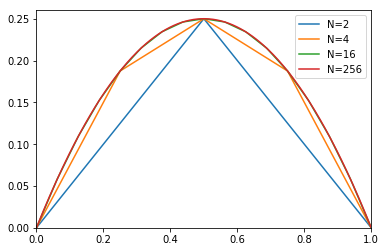

In [13]:
def f(x):
    return 2

def fem_solver(a, b, N, g=[0, 0]):
    h = (b-a)/N     # mesh size
    x = np.arange(a, b+h, h)              # node coordinates
    A = stiffness_matrix_assembler(x) 
    B = load_vector_assembler(x, g)
    xi = np.linalg.solve(A, B)               # equivalent to Matlab A\B
    return x, xi
    #plt.plot(x, xi)

N = [2, 4, 16, 256]
for i in range(len(N)):
    x, xi = fem_solver(0, 1, N[i])
    plt.plot(x, xi, label='N=%d'%N[i])
    
plt.legend()
plt.xlim((0, 1))
plt.ylim((0, .26))
plt.show()


## Problem 2
$f = 0, u(1) = 7$

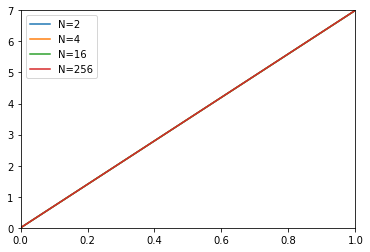

In [26]:
def f(x):
    return 0

g = [0, 7]
N = [2, 4, 16, 256]
for i in range(len(N)):
    x, xi = fem_solver(0, 1, N[i], g)
    plt.plot(x, xi, label='N=%d'%N[i])

plt.legend()
plt.xlim((0,1))
plt.ylim((0,7))
plt.show()

## Problem 3
Investigate the convergence rate of the finite element approximation $u_h$. Set up a problem for which the exact solution $u$ is known and study how the error $e = u-u_h$ behaves when the mesh size $h$ decreases. In particular, use the energy norm $||\cdot||_E$ to measure the error $e$. The energy norm depends on your choice of problem, but for the model problem (1) it is defined by   
$$||w||^2_E = \int_a^b(w')^2 dx$$
To compute $||e||_E$ note that $||e||_E^2 = ||u'||^2 - ||u_h'||^2$ due to orthogonality. Further, the term $||u_h'||^2$ may be numerically evaluated by the dot product $x_i^T*A*x_i$.

We know that 
$$u = -x^2 + x$$
$$u' = -2x + 1$$
$$||u'||^2 = \int_0^1 u'u' dx = \int_0^1(4x^2 - 4x + 1) dx = 1/3$$

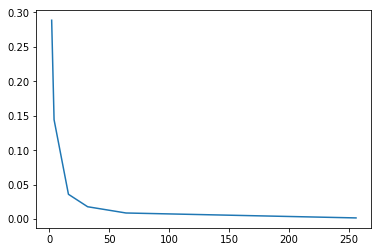

In [27]:
def analytical(x):
    return x*(1-x)


def f(x):
    return 2

# Given the analytical function, the 2-norm of u' is calculated to be 1/3

def error(N):
    x, xi = fem_solver(0, 1, N, g)
    A = stiffness_matrix_assembler(x)
    du_h_norm = np.asscalar(np.transpose(xi)@A@xi)
    e = np.sqrt(np.abs(1/3 - du_h_norm))
    return e

N = [2, 4, 16, 32, 64, 256]
e = []
g = [0, 0]
for i in range(len(N)):
    e.append(error(N[i]))

plt.plot(N, e)
plt.show()
    

## Problem 4
Change $A[0,:]$ and $A[n, :]$ to the corresponding rows of the identity matrix. And add the boundary condition in B. Same condition as in Problem 1 and compare. 

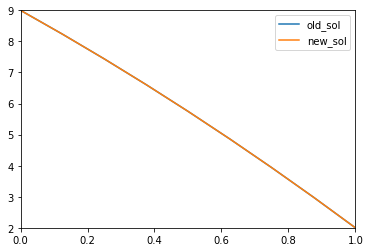

821070.1083855842
68.97530976669611


In [7]:
def f(x):
    return 2


def stiffness_matrix_assembler_mod(x):
    ''' Returns the assembled stiness matrix A.
        Input is a vector x of node coordinates.'''
    N = len(x) - 1             # number of elements
    A = np.zeros((N+1, N+1))   # initialize stiffness matrix to zero
    I = np.eye(N+1)
    for i in range(N):
        h = x[i+1] - x[i]      # loop over elements
        n = np.array([i, i+1]) # nodes
        A[np.ix_(n, n)] = A[np.ix_(n, n)] + np.array([[1, -1], [-1, 1]])/h  # assemble element stiffness
    #A[0, 0] = 1e6              # Adjusted for BC
    #A[N, N] = 1e6
    A[0,:] = I[0,:]
    A[N,:] = I[N,:]
    
    return A


def load_vector_assembler_mod(x, g=[0, 0]):
    '''Returns the assembled load vector b.
       Input is a vector x of node coordinates'''
    N = len(x) - 1
    B = np.zeros([N+1, 1])
    for i in range(N):
        h = x[i+1] - x[i]
        n = np.array([i, i+1])
        B[np.ix_(n)] = B[np.ix_(n)] + np.array([[f(x[i])], [f(x[i+1])]])*h/2
    #B[0] += g[0]*1e6
    #B[N] += g[1]*1e6
    B[0] = g[0]
    B[N] = g[1]
    #print(B)
    return B

def fem_solver_compare(a, b, N, g=[9, 2]):
    h = (b-a)/N     # mesh size
    x = np.arange(a, b+h, h)              # node coordinates
    A1 = stiffness_matrix_assembler(x)
    A2 = stiffness_matrix_assembler_mod(x) 
    B1 = load_vector_assembler(x, g)
    B2 = load_vector_assembler_mod(x, g)
    xi1 = np.linalg.solve(A1, B1)               
    xi2 = np.linalg.solve(A2, B2)
    return x, xi1, xi2, A1, A2
    
    
N = 8
# The modified solution
x, xi1, xi2, A1, A2 = fem_solver_compare(0, 1, N)
# The old solution
plt.plot(x, xi1, label='old_sol')
plt.plot(x, xi2, label='new_sol')
plt.legend()
plt.xlim((0, 1))
plt.ylim((2, 9))
plt.show()

print(np.linalg.cond(A1))
print(np.linalg.cond(A2))

"The condition number of the stiffness matrix used in the Robin boundary condition approximation (Problem 1 - 3) is much higher than the one for the strongly enforced boundary conditions (Problem 4). Hence, it is better to use the last method to ensure the convergence of iterative "

## Problem 5
$$-u'' = e^{-1000(x-0.5)^2}$$ in $-1<x<1$, $u(-1)=u(1)=0$. Write a function that assembles the mass matrix and compute the **discrete Laplacian** $\Delta h_u$ using the algorithm discussed in above. For this you can copy your code `my-stiffness-matrix-assembler.m` into a new file and modify it. Then, compute the residual of the finite element approximation. Test your code with different mesh resolutions and plot the residual for all of them. Does it decrease as mesh is refined?

In [24]:
def f(x):
    return np.exp(-1000*(x-0.5)**2)


def mass_matrix_assembler(x):
    ''' Returns the assembled stiness matrix A.
        Input is a vector x of node coordinates.'''
    N = len(x) - 1             # number of elements
    M = np.zeros((N+1, N+1))   # initialize stiffness matrix to zero
    
    for i in range(N):
        h = x[i+1] - x[i]      # element length
        n = np.array([i, i+1]) # nodes
        M[np.ix_(n, n)] = M[np.ix_(n, n)] + np.array([[2, 1], [1, 2]])/6*h  # assemble element stiffness
    return M


def ksi(A, b):
    return np.linalg.solve(A, b)


def zeta(M, A, xi):
    ''' Returns the nodal values of the discrete Laplacian
    '''
    return (- np.linalg.inv(M)@A@xi).reshape((len(xi), ))


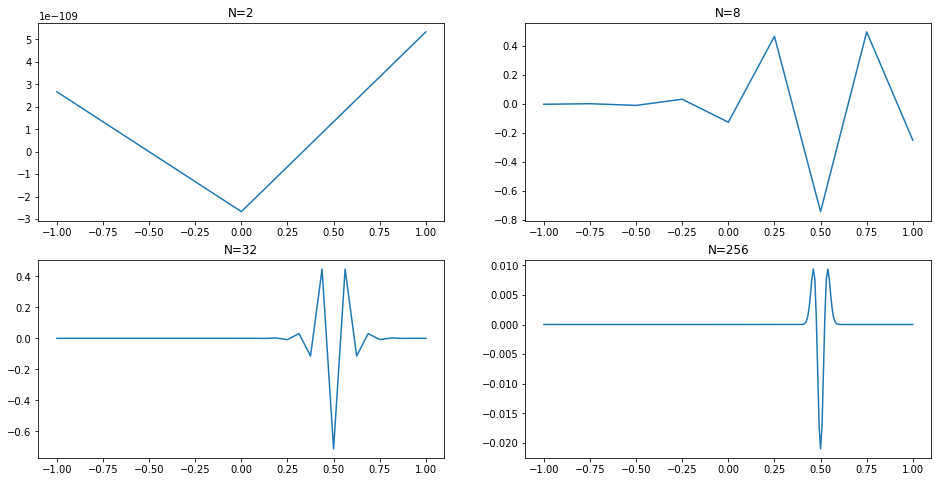

In [25]:
a = -1
b = 1
g = [0, 0]
N = [2, 8, 32, 256]

plt.figure(figsize=(16, 8))

for i in range(len(N)):
    
    h = (b-a)/N[i]     # mesh size
    x = np.arange(a, b+h, h)
    A = stiffness_matrix_assembler_mod(x)
    B = load_vector_assembler_mod(x)
    M = mass_matrix_assembler(x)
    xi = ksi(A, B)
    z = zeta(M, A, xi) # nodal values of the discrete laplacian
    force = f(x)
    residual = force + z
    plt.subplot(2, 2, 1+i)
    plt.plot(x, residual)
    plt.gca().set_title('N=%d'%N[i])

plt.show()
